<a href="https://colab.research.google.com/github/airctic/icevision/blob/master/notebooks/quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Efficientdet
[EfficientDet: Scalable and Efficient Object Detection](https://arxiv.org/pdf/1911.09070.pdf)

## Installing IceVision and IceData

In [2]:
# !pip install icevision[all] icedata

## Imports

In [1]:
from icevision.all import *

In [4]:
models.torchvision.faster_rcnn.backbones.resnet18_fpn

<function icevision.backbones.resnet_fpn.resnet18_fpn(pretrained: bool = True, **kwargs)>

## Data

In [2]:
data_dir = icedata.fridge.load_data()
train_ds, valid_ds = icedata.fridge.dataset(data_dir)

  0%|          | 0/128 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:134


## DataLoader

In [5]:
# DataLoaders
train_dl = efficientdet.train_dl(train_ds, batch_size=16, num_workers=4, shuffle=True)
valid_dl = efficientdet.valid_dl(valid_ds, batch_size=16, num_workers=4, shuffle=False)

## Model

In [6]:
model = efficientdet.model(model_name="tf_efficientdet_lite0", num_classes=icedata.fridge.NUM_CLASSES, img_size=384)

## Metrics

In [7]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

## Training

### Training using fastai

In [14]:
learn = efficientdet.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

SuggestedLRs(lr_min=0.06309573650360108, lr_steep=0.5248074531555176)

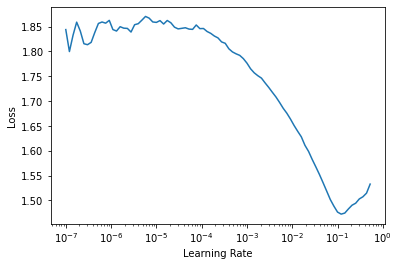

In [15]:
learn.freeze()
learn.lr_find()

In [16]:
learn.fine_tune(20, 1e-2, freeze_epochs=2)

epoch,train_loss,valid_loss,COCOMetric,time
0,1.608587,1.285580,0.000923,00:07
1,1.469750,1.248829,0.062395,00:06


epoch,train_loss,valid_loss,COCOMetric,time
0,1.078441,1.144149,0.203484,00:08
1,1.011428,1.054075,0.200839,00:06
2,0.934588,0.959530,0.158209,00:06
3,0.869646,0.867388,0.293635,00:07
4,0.812865,0.780286,0.351964,00:07
5,0.759438,0.715137,0.401513,00:07
6,0.717846,0.779357,0.346826,00:07
7,0.675276,0.543206,0.612008,00:07
8,0.636868,0.529731,0.573350,00:07
9,0.602964,0.510878,0.664142,00:07


In [17]:
learn.save('fridge')

Path('models/fridge.pth')

In [15]:
learn.load('fridge')

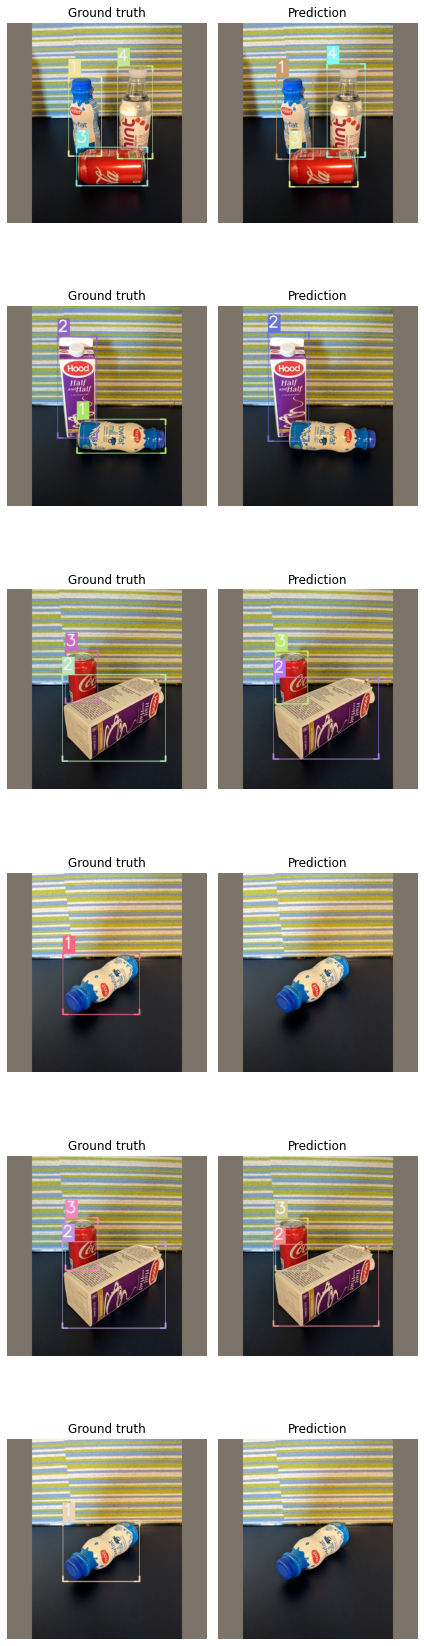

In [18]:
efficientdet.show_results(model, valid_ds)

### Training using Lightning

In [8]:
class LightModel(efficientdet.lightning.ModelAdapter):
    def configure_optimizers(self):
        return SGD(self.parameters(), lr=1e-2)
    
light_model = LightModel(model, metrics=metrics)

In [1]:
trainer = pl.Trainer(max_epochs=20, gpus=1)
trainer.fit(light_model, train_dl, valid_dl)

## Happy Learning!

If you need any assistance, feel free to join our [forum](https://discord.gg/JDBeZYK).